In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading the Dataset **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import files
uploaded = files.upload()

Saving blinkit_orders.csv to blinkit_orders.csv


In [4]:
import pandas as pd

df = pd.read_csv("blinkit_orders.csv")
df.head()

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9886  
3                61497      7917  
4                84315      2741

In [5]:
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   order_id                5000 non-null   int64  
 1   customer_id             5000 non-null   int64  
 2   order_date              5000 non-null   object 
 3   promised_delivery_time  5000 non-null   object 
 4   actual_delivery_time    5000 non-null   object 
 5   delivery_status         5000 non-null   object 
 6   order_total             5000 non-null   float64
 7   payment_method          5000 non-null   object 
 8   delivery_partner_id     5000 non-null   int64  
 9   store_id                5000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 390.8+ KB
None
     order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 1

# ** Data Cleaning**

In [6]:
print(df.isnull().sum())
df.fillna(method='ffill', inplace=True)

order_id                  0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
dtype: int64


<ipython-input-6-76e85a1d42e6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# ** Remove Duplicates**

In [7]:
df.drop_duplicates(inplace=True)


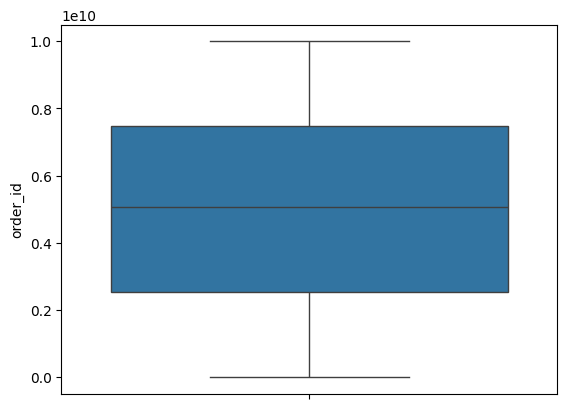

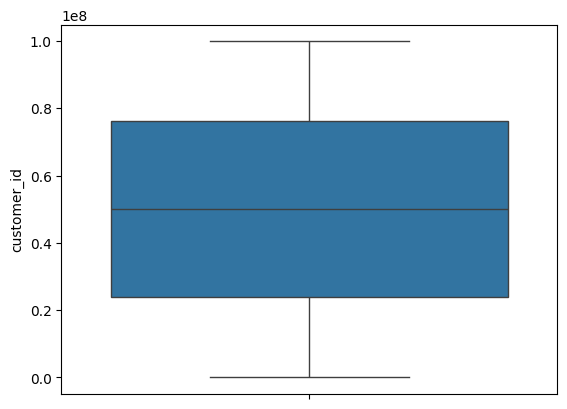

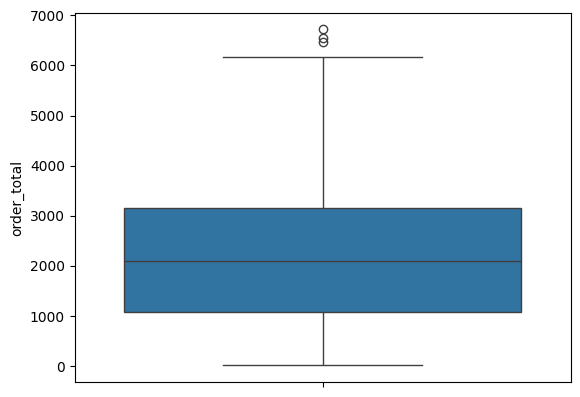

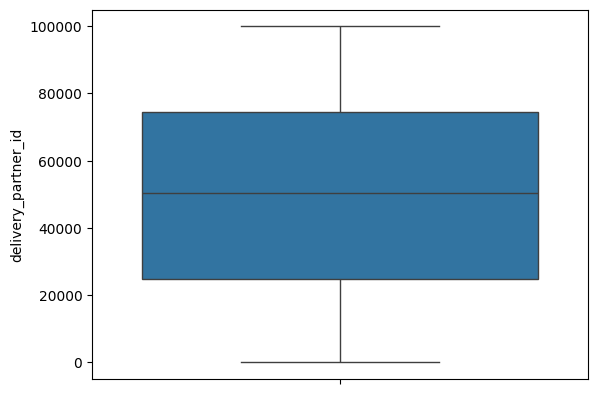

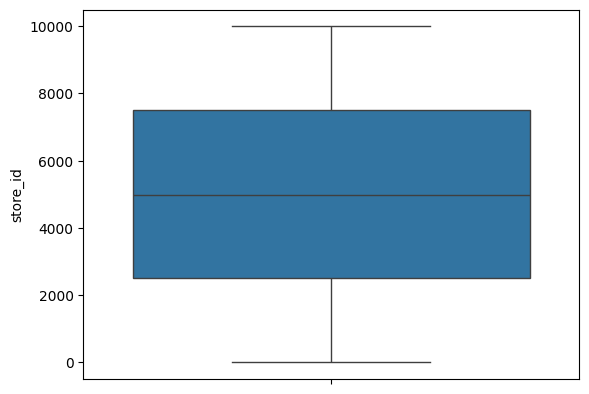

In [8]:
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(df[col])
    plt.show()

In [26]:
from google.colab import files
files.download('/content/cleaned_blinkit_orders.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100

print(missing_values)
print(missing_percentage)

Series([], dtype: int64)
Series([], dtype: float64)


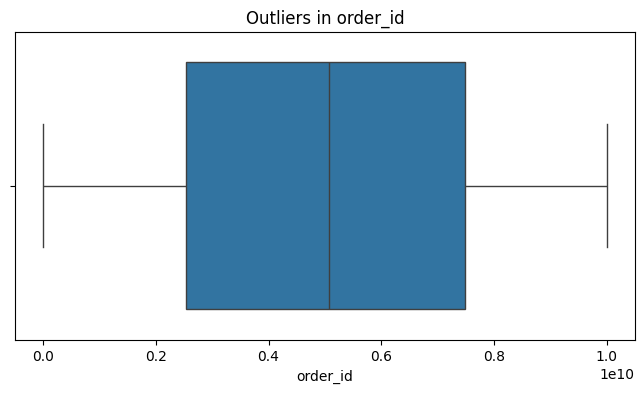

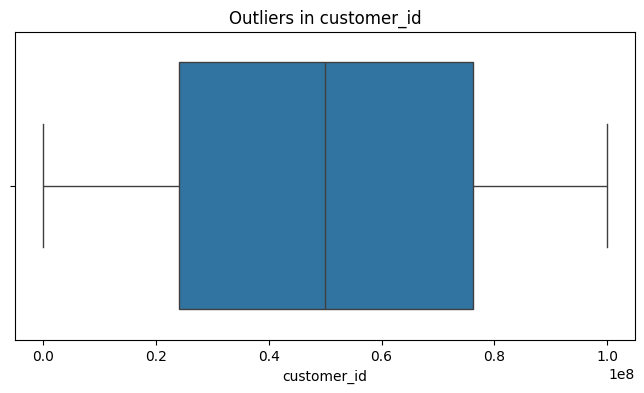

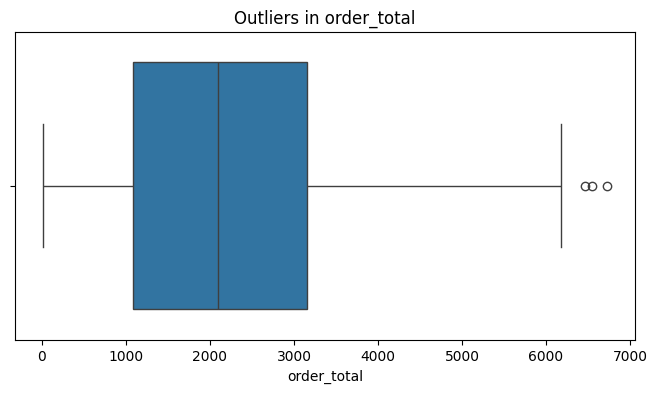

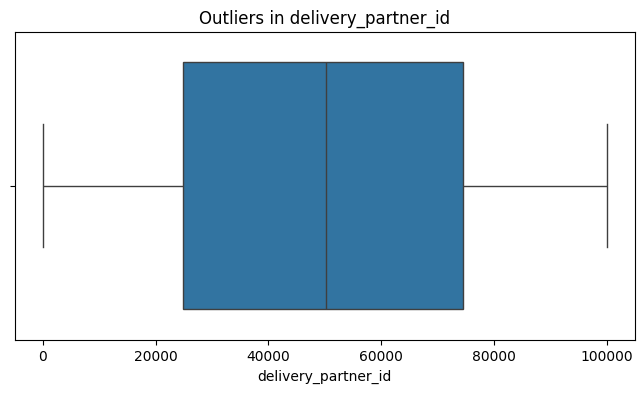

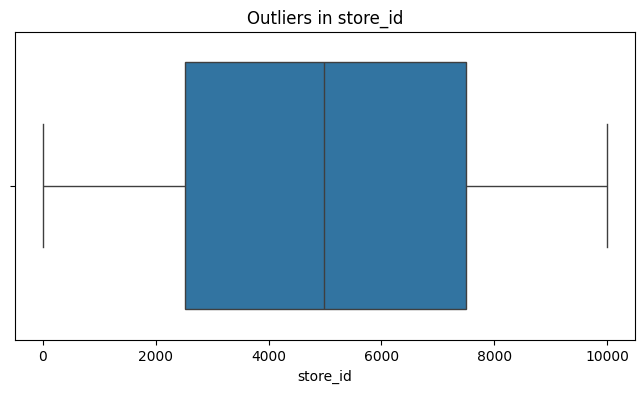

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Outliers in {col}')
    plt.show()


In [11]:
import numpy as np


def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df_cleaned = remove_outliers(df, 'order_total')

print(f"قبل التنظيف: {len(df)}, بعد التنظيف: {len(df_cleaned)}")


قبل التنظيف: 5000, بعد التنظيف: 4997


In [12]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['promised_delivery_time'] = pd.to_datetime(df['promised_delivery_time'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])


In [13]:

missing_values = df.isnull().sum()


df.fillna(0, inplace=True)


In [14]:

df.drop_duplicates(inplace=True)


In [15]:

df = df[df['order_total'] < 5000]


In [16]:

df['delivery_time_diff'] = (df['actual_delivery_time'] - df['promised_delivery_time']).dt.total_seconds()


In [17]:
df['order_total'] = df['order_total'].astype(float)


In [18]:
df['delivery_status'] = df['delivery_status'].apply(lambda x: 'On Time' if x == 'On Time' else 'Late')


In [19]:

df_numeric = df.select_dtypes(include=['number'])


correlation_matrix = df_numeric.corr()
print(correlation_matrix)



                     order_id  customer_id  order_total  delivery_partner_id  \
order_id             1.000000    -0.006628    -0.014377             0.005583   
customer_id         -0.006628     1.000000     0.029208            -0.020105   
order_total         -0.014377     0.029208     1.000000             0.007022   
delivery_partner_id  0.005583    -0.020105     0.007022             1.000000   
store_id            -0.008638     0.005173    -0.015001             0.004178   
delivery_time_diff   0.000415     0.018295    -0.016136             0.026947   

                     store_id  delivery_time_diff  
order_id            -0.008638            0.000415  
customer_id          0.005173            0.018295  
order_total         -0.015001           -0.016136  
delivery_partner_id  0.004178            0.026947  
store_id             1.000000           -0.007393  
delivery_time_diff  -0.007393            1.000000  


In [20]:

df['payment_method'] = df['payment_method'].map({'Cash': 1, 'Card': 2, 'UPI': 3})


df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                     order_id  customer_id  order_total  payment_method  \
order_id             1.000000    -0.006628    -0.014377        0.003533   
customer_id         -0.006628     1.000000     0.029208       -0.005449   
order_total         -0.014377     0.029208     1.000000       -0.014267   
payment_method       0.003533    -0.005449    -0.014267        1.000000   
delivery_partner_id  0.005583    -0.020105     0.007022        0.000037   
store_id            -0.008638     0.005173    -0.015001        0.021738   
delivery_time_diff   0.000415     0.018295    -0.016136       -0.013733   

                     delivery_partner_id  store_id  delivery_time_diff  
order_id                        0.005583 -0.008638            0.000415  
customer_id                    -0.020105  0.005173            0.018295  
order_total                     0.007022 -0.015001           -0.016136  
payment_method                  0.000037  0.021738           -0.013733  
delivery_partner_id             1.

In [21]:

df['delivery_status'] = df['delivery_status'].map({'On Time': 1, 'Late': 0})

df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                     order_id  customer_id  delivery_status  order_total  \
order_id             1.000000    -0.006628        -0.004719    -0.014377   
customer_id         -0.006628     1.000000        -0.014782     0.029208   
delivery_status     -0.004719    -0.014782         1.000000     0.011378   
order_total         -0.014377     0.029208         0.011378     1.000000   
payment_method       0.003533    -0.005449         0.013268    -0.014267   
delivery_partner_id  0.005583    -0.020105        -0.020947     0.007022   
store_id            -0.008638     0.005173        -0.007365    -0.015001   
delivery_time_diff   0.000415     0.018295        -0.827121    -0.016136   

                     payment_method  delivery_partner_id  store_id  \
order_id                   0.003533             0.005583 -0.008638   
customer_id               -0.005449            -0.020105  0.005173   
delivery_status            0.013268            -0.020947 -0.007365   
order_total               -0.014267

In [22]:

df['payment_method'] = df['payment_method'].map({'Cash': 1, 'Card': 2, 'UPI': 3})


df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()
print(correlation_matrix)


                     order_id  customer_id  delivery_status  order_total  \
order_id             1.000000    -0.006628        -0.004719    -0.014377   
customer_id         -0.006628     1.000000        -0.014782     0.029208   
delivery_status     -0.004719    -0.014782         1.000000     0.011378   
order_total         -0.014377     0.029208         0.011378     1.000000   
payment_method            NaN          NaN              NaN          NaN   
delivery_partner_id  0.005583    -0.020105        -0.020947     0.007022   
store_id            -0.008638     0.005173        -0.007365    -0.015001   
delivery_time_diff   0.000415     0.018295        -0.827121    -0.016136   

                     payment_method  delivery_partner_id  store_id  \
order_id                        NaN             0.005583 -0.008638   
customer_id                     NaN            -0.020105  0.005173   
delivery_status                 NaN            -0.020947 -0.007365   
order_total                     NaN

In [23]:

correlation_matrix = df.corr()
print(correlation_matrix)


                        order_id  customer_id  order_date  \
order_id                1.000000    -0.006628   -0.024590   
customer_id            -0.006628     1.000000    0.022234   
order_date             -0.024590     0.022234    1.000000   
promised_delivery_time -0.024590     0.022234    1.000000   
actual_delivery_time   -0.024590     0.022235    1.000000   
delivery_status        -0.004719    -0.014782   -0.019067   
order_total            -0.014377     0.029208   -0.015627   
payment_method               NaN          NaN         NaN   
delivery_partner_id     0.005583    -0.020105    0.002665   
store_id               -0.008638     0.005173    0.005402   
delivery_time_diff      0.000415     0.018295    0.031186   

                        promised_delivery_time  actual_delivery_time  \
order_id                             -0.024590             -0.024590   
customer_id                           0.022234              0.022235   
order_date                            1.000000     

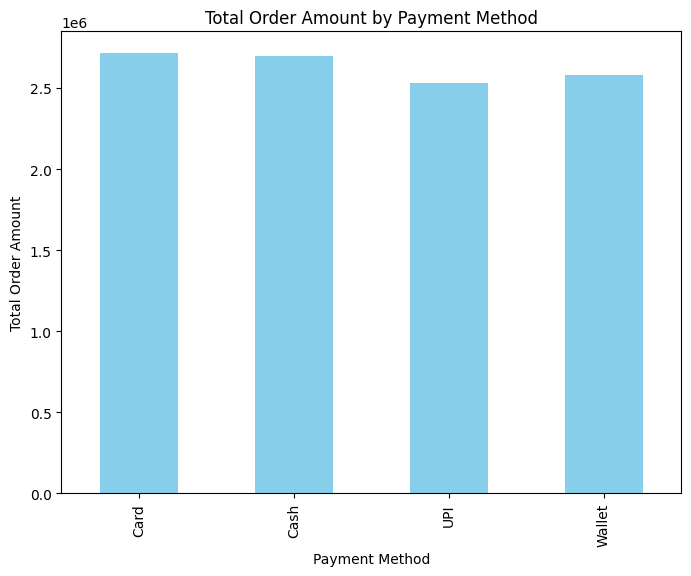

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
df.groupby('payment_method')['order_total'].sum().plot(kind='bar', color='skyblue')
plt.title('Total Order Amount by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Order Amount')
plt.show()


In [24]:

df.to_csv('cleaned_data.csv', index=False)


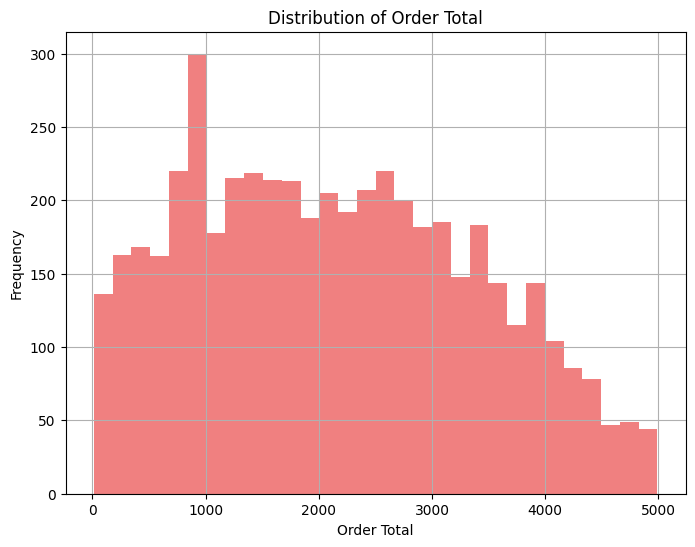

In [ ]:

plt.figure(figsize=(8, 6))
df['order_total'].hist(bins=30, color='lightcoral')
plt.title('Distribution of Order Total')
plt.xlabel('Order Total')
plt.ylabel('Frequency')
plt.show()

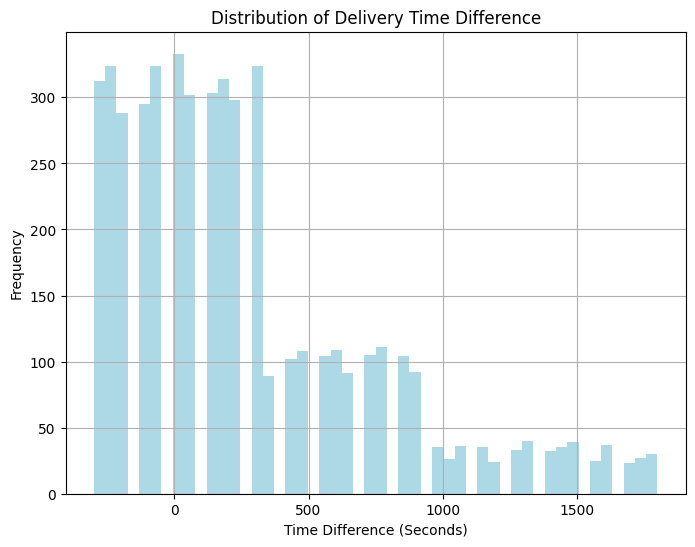

In [ ]:
plt.figure(figsize=(8, 6))
df['delivery_time_diff'].hist(bins=50, color='lightblue')
plt.title('Distribution of Delivery Time Difference')
plt.xlabel('Time Difference (Seconds)')
plt.ylabel('Frequency')
plt.show()

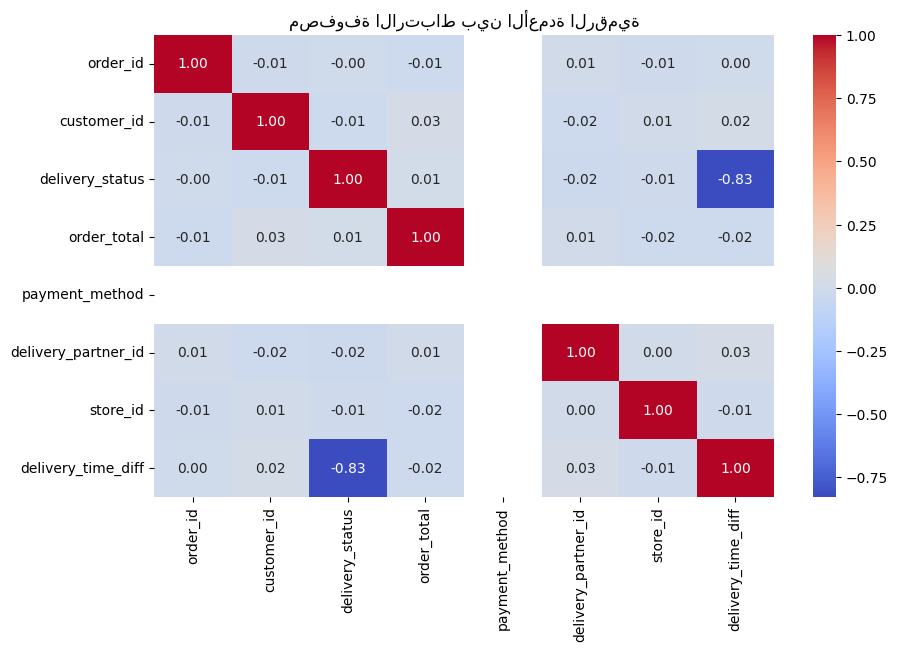

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("مصفوفة الارتباط بين الأعمدة الرقمية")
plt.show()


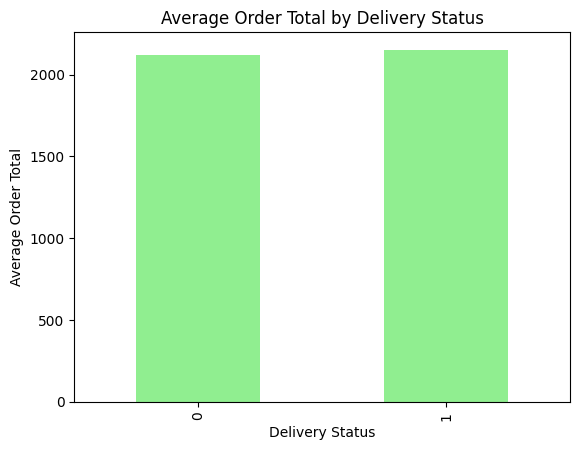

In [ ]:

df.groupby('delivery_status')['order_total'].mean().plot(kind='bar', color='lightgreen')
plt.title('Average Order Total by Delivery Status')
plt.xlabel('Delivery Status')
plt.ylabel('Average Order Total')
plt.show()


In [ ]:

X = df[['order_total', 'delivery_time_diff']]
y = df['delivery_status']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


In [ ]:
import joblib


joblib.dump(model, 'delivery_status_model.pkl')


['delivery_status_model.pkl']

In [ ]:

model = joblib.load('delivery_status_model.pkl')


new_data = pd.DataFrame({'order_total': [2000], 'delivery_time_diff': [300]})
prediction = model.predict(new_data)
print(f'Predicted Delivery Status: {prediction[0]}')


Predicted Delivery Status: 1
